Cacophony for the whole family
==============================

Allen Downey

This is an example that demonstrates some of the features in the *Think DSP* library.

It is inspired by the performance of a grade school band I witnessed recently.  My goal is to simulate the sound of a beginner band.


In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import random

%matplotlib inline

First, a function that translates from a MIDI number to a frequency:

In [2]:
def midi_to_freq(midi_num):
    """Converts MIDI note number to frequency.

    midi_num: int MIDI note number
    
    returns: float frequency in Hz
    """
    x = (midi_num - 69) / 12.0
    freq = 440.0 * 2**x
    return freq

Now here's a randomized version that simulates three kinds of errors: poor tuning, playing the wrong note, and popping an overtone.  Notice that it is possible to make all three errors.

In [3]:
def random_freq(midi_num):

    # simulate poor tuning by adding gaussian noise to the MIDI number
    midi_num += random.gauss(0, 0.5)
    
    # one kid out of 10 plays the wrong note
    if random.random() < 0.1:
        midi_num += random.randint(-5, 5)
        
    freq = midi_to_freq(midi_num)
    
    # and one kid in 10 pops an overtone
    if random.random() < 0.1:
        freq *= random.randint(2, 5)

    return freq

This function takes a MIDI number and duration and makes a Wave:

In [4]:
def make_note(midi_num, duration, framerate=22050):
    """Make a MIDI note with the given duration.

    midi_num: int MIDI note number
    duration: float seconds
    sig_cons: Signal constructor function
    framerate: int frames per second

    returns: Wave
    """
    freq = random_freq(midi_num)
    signal = thinkdsp.SawtoothSignal(freq)
    wave = signal.make_wave(duration, framerate=framerate)
    wave.apodize()
    return wave

Let's test make_note.  MIDI number 60 is middle C.

In [5]:
note = make_note(60, 1.0)
note.make_audio()

Sounds good.

Now we can make 10 notes and play them at the same time.  Since Wave provides `__add__`, we can use `sum`:

In [6]:
def make_ensemble(midi_num, duration):
    notes = [make_note(midi_num, duration) for i in range(10)]
    ensemble = sum(notes)
    ensemble.make_audio()
    return ensemble

And we can test it with a middle C:

In [7]:
c = make_ensemble(60, 1.0)
c.make_audio()

Good, sounds like a nest of angry wasps.

And now, a rousing chorus of that old crowd favorite, Hot Cross Buns.

Wave provides `__or__`, which concatenates notes, so we can use `reduce`:

In [8]:
midi_nums = [64, 62, 60,     64, 62, 60,    60, 60, 60, 60,      62, 62, 62, 62,      64, 62, 60]
durations = [0.5, 0.5, 1.0,  0.5, 0.5, 1.0, 0.25, 0.25, 0.25, 0.25,  0.25, 0.25, 0.25, 0.25,  0.5, 0.5, 1.0]

waves = [make_ensemble(midi_num, duration) for midi_num, duration in zip(midi_nums, durations)]
wave = reduce(thinkdsp.Wave.__or__, waves)
wave.make_audio()

And that brings a tear of pride to any parent's eye.

On a more serious note, this example tells us something about how the ear interprets complex sounds with many tones and harmonics.

Let's take a look at the spectrum of that middle C:

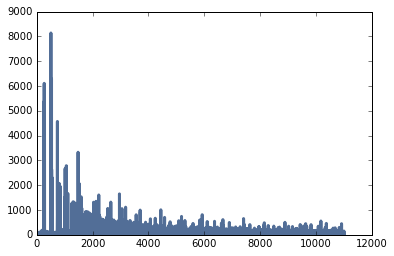

In [9]:
spectrum = c.make_spectrum()
spectrum.plot()

And we can zoom in on the first few harmonics:

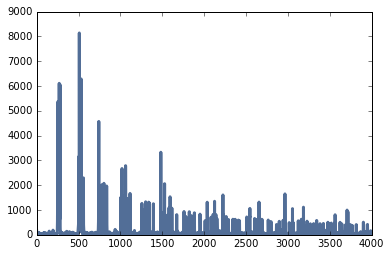

In [10]:
spectrum.plot(high=4000)

A few observations: (1) The kids playing out of tune have a bigger effect on the harmonics, and less effect on the fundamental, so the ear can still pick out a clear pitch, and (2) some of the unintensional overtones overlap with the harmonics, so they change the timbre, but don't stick out as much as you might expect, (3) the high harmonics are so spread out that they basically contribute white noise and don't affect the perceived pitch.